<a href="https://colab.research.google.com/github/Emma-Ok/MonitoriasLogica2_2024-2/blob/main/Programacion_dinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Fibonacci*

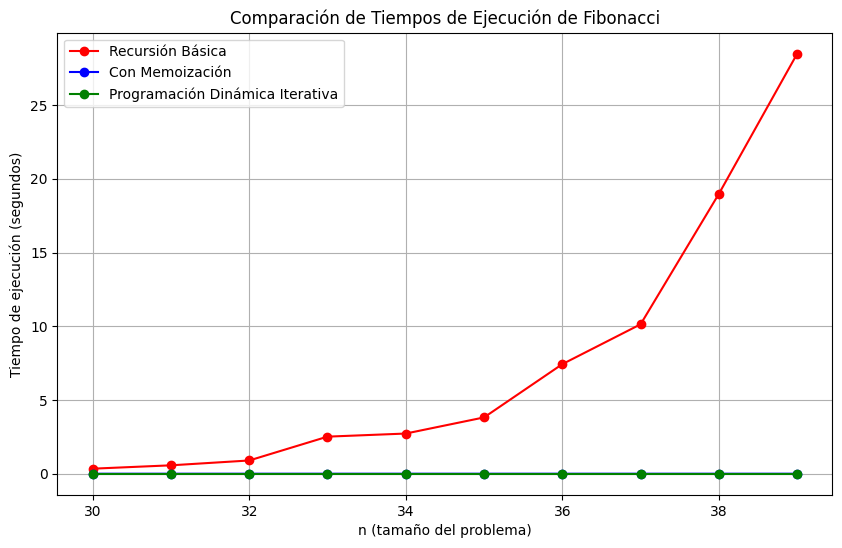

Conclusión:
1. La recursión básica tiene una complejidad exponencial O(2^n), lo que la hace muy ineficiente.
2. La memoización mejora significativamente el rendimiento al reducir la complejidad a O(n),
   almacenando resultados intermedios y evitando cálculos redundantes.
3. La programación dinámica iterativa también tiene complejidad O(n) pero utiliza menos memoria,
   ya que no requiere una estructura para almacenar todos los subproblemas.


In [ ]:
import time
import matplotlib.pyplot as plt

# 1. Implementación recursiva básica de Fibonacci
def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

# 2. Implementación con programación dinámica (iterativa)
def fibonacci_dynamic(n):
    if n == 0 or n == 1:
        return n
    F_anterior = 0
    F_actual = 1
    for i in range(2, n + 1):
        F_i = F_anterior + F_actual
        F_anterior = F_actual
        F_actual = F_i
    return F_actual

# 3. Implementación con memoización de Fibonacci
from functools import lru_cache

@lru_cache(maxsize=None)  # Usamos memoización con functools
def fibonacci_memoization(n):
    if n <= 1:
        return n
    return fibonacci_memoization(n - 1) + fibonacci_memoization(n - 2)

# 4. Medición de tiempos para todas las implementaciones
def measure_execution_time(func, n_values):
    times = []
    for n in n_values:
        start_time = time.time()
        func(n)
        times.append(time.time() - start_time)
    return times

# Valores de prueba para n
n_values = range(30, 40)  # Valores moderados para la recursión básica

# Tiempo de ejecución de cada implementación
recursive_times = measure_execution_time(fibonacci_recursive, n_values)
memoization_times = measure_execution_time(fibonacci_memoization, n_values)
dynamic_times = measure_execution_time(fibonacci_dynamic, n_values)

# 5. Visualización gráfica
plt.figure(figsize=(10, 6))
plt.plot(n_values, recursive_times, label='Recursión Básica', marker='o', color='red')
plt.plot(n_values, memoization_times, label='Con Memoización', marker='o', color='blue')
plt.plot(n_values, dynamic_times, label='Programación Dinámica Iterativa', marker='o', color='green')
plt.title('Comparación de Tiempos de Ejecución de Fibonacci')
plt.xlabel('n (tamaño del problema)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend()
plt.grid()
plt.show()

# 6. Conclusión
print("Conclusión:")
print("1. La recursión básica tiene una complejidad exponencial O(2^n), lo que la hace muy ineficiente.")
print("2. La memoización mejora significativamente el rendimiento al reducir la complejidad a O(n),")
print("   almacenando resultados intermedios y evitando cálculos redundantes.")
print("3. La programación dinámica iterativa también tiene complejidad O(n) pero utiliza menos memoria,")
print("   ya que no requiere una estructura para almacenar todos los subproblemas.")


**Programacion dinámica**
El problema consiste en grupo de jugadores que toman
turnos para remover monedas desde una l´ınea de monedas hasta maximizar el valor total de las
monedas recogidas.

Considerando la descripción del problema, para el diseño con aproximación descendente o
memoization, es necesario considerar cuatro condiciones para el diseño del algoritmo:
• Descomponer el problema en subproblemas. Para el contexto del juego Monedas en una línea,
el subproblema podría ser encontrar el valor máximo de una sub-secuencia de monedas.
• Para facilitar el almacenamiento de las soluciones de los subproblemas, es necesario establecer
una matriz T, tal que T[h, k] represente el máximo valor que puede ser obtenido desde la
sub-secuencia de monedas desde la posición h hasta la posición k.
• Al ejecutar el algoritmo, se debe rellenar la matriz desde los subproblemas más pequeños
hasta los subproblemas más grandes, haciendo uso de valores calculados previamente.



Aproximación descendente
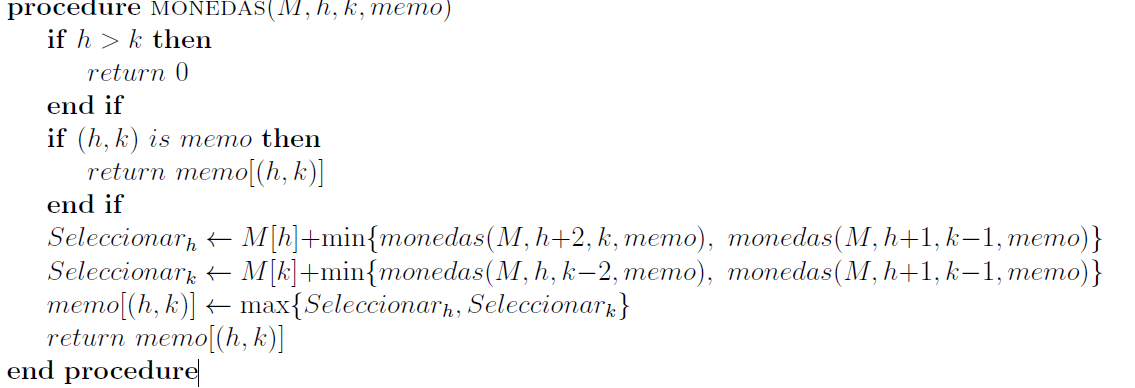



In [ ]:
def monedas_en_una_linea(monedas):
    n = len(monedas)
    # Crear una tabla DP de tamaño n x n
    dp = [[0] * n for _ in range(n)]

    # Llenar la tabla para subproblemas de tamaño 1 (diagonal principal)
    for i in range(n):
        dp[i][i] = monedas[i]

    # Llenar la tabla para subproblemas más grandes (visión descendente o ascendente)
    for longitud in range(2, n + 1):  # longitud de la subcadena
        for i in range(n - longitud + 1):
            j = i + longitud - 1  # Fin del rango actual
            # Elegir el extremo izquierdo o derecho
            opcion_izquierda = monedas[i] + min(
                dp[i + 2][j] if i + 2 <= j else 0,
                dp[i + 1][j - 1] if i + 1 <= j - 1 else 0
            )
            opcion_derecha = monedas[j] + min(
                dp[i][j - 2] if i <= j - 2 else 0,
                dp[i + 1][j - 1] if i + 1 <= j - 1 else 0
            )
            # Guardar el valor máximo en la tabla
            dp[i][j] = max(opcion_izquierda, opcion_derecha)

    # El resultado final está en dp[0][n-1]
    return dp[0][n - 1]


In [ ]:
# Ejemplo 1
monedas = [1, 2, 3, 4, 5]
resultado = monedas_en_una_linea(monedas)
print(f"La mejor cantidad que puedes recolectar es: {resultado}")

La mejor cantidad que puedes recolectar es: 9


# Aplicaciones de la Programación Dinámica.

Maxima suma de los nodos con Backtracking

In [ ]:
def inicio(n): # n es el numero de nodos
  nodo = {}
  for i in range(n + 1):
    nodo[i] = []
  return nodo

def estructura_arbol_no_dirigido(nodo,pos):
  for k in range(0,len(pos)):
    nodo[pos[k][0]].append(pos[k][1])
    nodo[pos[k][1]].append(pos[k][0])
  return nodo

PD = [0]*50

def dfs_no_dirigido(valores_nodos,nodo,pos_inicial,raiz):
  PD[pos_inicial] = valores_nodos[pos_inicial - 1]
  valor_maximo = 0
  for nodo_hijo in nodo[pos_inicial]:
    if nodo_hijo == raiz:
      continue
    dfs_no_dirigido(valores_nodos,nodo,nodo_hijo,pos_inicial)
    valor_maximo = max(valor_maximo, PD[nodo_hijo])
  PD[pos_inicial] += valor_maximo

def Calcular_Maximos(valores_nodos, nodo):
    dfs_no_dirigido(valores_nodos, nodo, 1, 0)
    return PD[1]

if __name__ == "__main__":
  nodo = inicio(14)
  pos = [[1,2],[1,3],[1,4],[2,5],[2,6],[3,7],[3,8],[4,9],[4,10],[5,11],[5,12],
  [10,13],[10,14]]
  valores_nodos = [5,15,7,17,7,9,4,8,1,9,3,4,4,8]
  arbol = estructura_arbol_no_dirigido(nodo,pos)
  Suma = Calcular_Maximos(valores_nodos, arbol)
  print("El maximo valor de la suma de subconjuntos es: ", Suma)

Máxima suma de los nodos usando Memoization

In [ ]:
class Trayectoria_Arbol:
    def __init__(self):
        self.Aristas, self.PD, self.nodo_visitado, self.MaxTray= [], [], [], 0

    def dfs_trayectoria(self, nodo_actual, puntos):
        nodo_hijos, self.registros = [], []
        self.nodo_visitado[nodo_actual] = 1
        for i in self.Aristas[nodo_actual]:
            if not self.nodo_visitado[i[0]]:
                self.dfs_trayectoria(i[0], puntos)
            nodo_hijos.append(self.PD[i[0]] - i[1])
        nodo_hijos.sort(reverse=True)
        maximo_x, maximo_y = 0, 0
        if len(nodo_hijos) >= 2:
            maximo_x = max(maximo_x, nodo_hijos[0])
            maximo_y = max(maximo_y, nodo_hijos[1])
        elif len(nodo_hijos) >= 1:
            maximo_x = max(maximo_x, nodo_hijos[0])
        self.MaxTray = max(self.MaxTray,
                           maximo_x + maximo_y + puntos[nodo_actual])
        self.PD[nodo_actual] = maximo_x + puntos[nodo_actual]

    def MaximaTrayectoria(self, n, puntos, Aristas_Ponderadas):
        self.Aristas = [[] for _ in range(n + 1)]
        self.PD, self.nodo_visitado= [0]*(n + 1), [0]*(n + 1)
        for i in range(n - 1):
            self.Aristas[Aristas_Ponderadas[i][0]].append((
                Aristas_Ponderadas[i][1], Aristas_Ponderadas[i][2]))
            self.Aristas[Aristas_Ponderadas[i][1]].append((
                Aristas_Ponderadas[i][0], Aristas_Ponderadas[i][2]))
        self.dfs_trayectoria(1, puntos)
        return self.MaxTray

if __name__ == "__main__":
    Busqueda = Trayectoria_Arbol()
    n = 7
    puntos = [0,1,2,4,1,3,3,4]
    Aristas_Ponderadas = [
        [1, 2, 11],
        [2, 3, 2],
        [2, 4, 3],
        [1, 5, 8],
        [5, 6, 4],
        [5, 7, 3],
    ]
    a, b = Busqueda.MaximaTrayectoria(n, puntos, Aristas_Ponderadas)
    print("Maxima longitud = ", a)
    print("\n")
    print("PD = ", b)

# Búsqueda de la Trayectoria más larga en GDA

In [ ]:
def insertar_adyacencia(relaciones, n):
    nodos_adyacentes = [[] for i in range(n + 1)]
    for i in range(len(relaciones)):
        nodos_adyacentes[relaciones[i][0]].append(relaciones[i][1])
    return nodos_adyacentes

def dfs_pd(nodo, nodos_adyacentes, PD, nodo_visitado):
    nodo_visitado[nodo] = True
    for i in range(0, len(nodos_adyacentes[nodo])):
        if not nodo_visitado[nodos_adyacentes[nodo][i]]:
            dfs_pd(nodos_adyacentes[nodo][i], nodos_adyacentes, PD, nodo_visitado)
        PD[nodo] = max(PD[nodo], 1 + PD[nodos_adyacentes[nodo][i]])

def Trayectoria_Maxima(nodos_adyacentes, n):
    PD = [0]*(n + 1)
    Valor = 0
    nodo_visitado = [False]*(n + 1)
    for i in range(1, n + 1):
        if not nodo_visitado[i]:
            dfs_pd(i, nodos_adyacentes, PD, nodo_visitado)
    for i in range(1, n + 1):
        Valor = max(Valor, PD[i])
    return Valor, PD

n = 6
relaciones = [[1,4], [1,5], [1,6], [2,3], [2,4], [3,5], [4,5], [4,6], [5,6]]
nodos_adyacentes = insertar_adyacencia(relaciones, n)
a,b = Trayectoria_Maxima(nodos_adyacentes, n)
print(a)
print(b)

# Búsqueda de la Trayectoria mínima con GDA ponderada

In [ ]:
from collections import defaultdict

class GDA:
    def __init__(self, nodos):
        self.V = nodos
        self.G = defaultdict(list)

    def aristas(self, i, j, w):
        self.G[i].append((j, w))

    def orden_topografico_subgrafo(self, nodo, nodo_predecesor, nodo_sucesor):
        nodo_predecesor[nodo] = True
        if i in self.G:
            for j,_ in self.G[i]:
                if not nodo_predecesor[j]:
                    self.orden_topografico_subgrafo(j, nodo_predecesor, nodo_sucesor)
        nodo_sucesor.append(nodo)

    def orden_topografico_principal(self):
        nodo_predecesor = {v: False for v in range(self.V)}
        nodo_sucesor = []
        for i in range(self.V):
            if not nodo_predecesor[i]:
                self.orden_topografico_subgrafo(i, nodo_predecesor, nodo_sucesor)
        return nodo_sucesor[::-1]

    def Minima_Trayectoria(self, nodo_inicio):
        nodos_sucesores = self.orden_topografico_principal()
        L = {v: float('inf') for v in range(self.V)}
        L[nodo_inicio] = 0
        while nodos_sucesores:
            i = nodos_sucesores.pop()
            if L[i] != float('inf'):
                for j, w in self.G[i]:
                    if L[i] + w < L[j]:
                        L[j] = L[i] + w
        return L

# Ejemplo de uso:
if __name__ == "__main__":
    g = GDA(9)
    g.aristas(0, 1, 5)
    g.aristas(0, 2, 10)
    g.aristas(0, 3, 2)
    g.aristas(1, 4, 15)
    g.aristas(1, 7, 11)
    g.aristas(2, 4, 1)
    g.aristas(2, 5, 14)
    g.aristas(3, 5, 12)
    g.aristas(3, 6, 15)
    g.aristas(4, 6, 22)
    g.aristas(5, 7, 25)
    g.aristas(6, 8, 2)
    g.aristas(7, 8, 2)
    s = 0
    print("Distancias más cortas desde el vértice origen %d:" % s)
    distancias = g.Minima_Trayectoria(s)
    for i in range(1,len(distancias)):
        print("Vértice %d: Distancia desde el origen = %d" % (i, distancias[i]))